In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# from importlib import reload
import curses  ####  pip install windows-curses

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import specsanalyzer
from specsanalyzer import SpecsAnalyzer

In [9]:
# reload(specsanalyzer)
spa = SpecsAnalyzer()
spa.__init__
spa.config['calib2d_dict'].keys()

dict_keys(['aUnit', 'aInner', 'eShift', 'eRange', 'aRange', 'eGrid', 'aGrid', 'De1', 'Da1', 'Da3', 'Da5', 'Da7', 'LowAngularDispersion', 'MediumAngularDispersion', 'HighAngularDispersion', 'WideAngleMode', 'LargeArea', 'MediumArea', 'SmallArea', 'SmallArea2', 'HighMagnification2', 'HighMagnification', 'MediumMagnification', 'LowMagnification', 'SuperWideAngleMode', 'supported_angle_modes', 'supported_space_modes'])

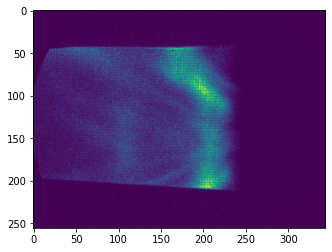

In [ ]:
with open("../tests/data/dataEPFL/R9132/Data9132_RAWDATA.tsv") as file:
    # with open('../tests/data/dataFHI/Scan1232.tsv') as file:
    tsv_data = np.loadtxt(file, delimiter="\t")
plt.figure()
plt.imshow(tsv_data)

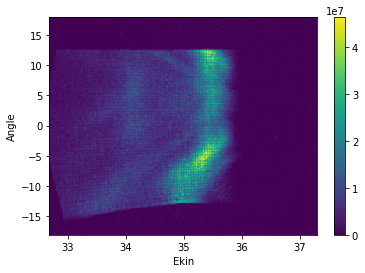

In [ ]:
# Testing convert and crop on the imported data
spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")

lens_mode = "WideAngleMode"
kinetic_energy = 35.0
pass_energy = 35.0
work_function=4.2
res_xarray = spa.convert_image(
    tsv_data, 
    lens_mode,
    kinetic_energy,
    pass_energy,
    work_function,
    
)
plt.figure()
res_xarray.plot(cmap="viridis", vmin=0)